In [2]:
import datetime as dt
import json
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.interpolate import make_interp_spline, BSpline, interp1d
import numpy as np

In [3]:
with open("config.json", "r") as config_file:
    config = json.load(config_file)

In [4]:
downloads_dir = "nps_downloads/"

kw_files = os.listdir(downloads_dir)

In [5]:
data = {}
for fname in kw_files:
    with open(os.path.join(downloads_dir, fname), "r") as f:
        keyword = fname.replace(".json", "")
        
        data[keyword] = json.load(f)

In [6]:
import re
def strip_urls(text):
    return re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

In [7]:
BIN_MINUTE = 60
BIN_HOUR = BIN_MINUTE * 60
BIN_DAY = BIN_HOUR * 24
BIN_WEEK = BIN_DAY * 7
BIN_MONTH = BIN_WEEK * 4

In [8]:
start_date = int(dt.datetime(2010, 1, 2).timestamp())
end_date = int(dt.datetime(2020, 11, 15).timestamp())

In [11]:
def plot_keyword(comment_obj, keywords, smooth=False, style="fivethirtyeight"):
    if type(keywords) == str:
        keywords = [keywords]
        
    years = mdates.YearLocator()
    months = mdates.MonthLocator()
    years_fmt = mdates.DateFormatter('%Y')
    months_fmt = mdates.DateFormatter('%b')

    times_dict = {}
    for keyword in keywords:
        comments = comment_obj[keyword]
        for comment in comments:
            text = strip_urls(comment['body'].lower())
            if keyword.lower() in text:
                times_dict[comment['id']] = comment['created_utc']
    
    times = sorted(list(times_dict.values()))
    bin_boundaries = range(start_date, end_date, BIN_MONTH)
    bins, bin_times, _ = plt.hist(times, bins=bin_boundaries)
    bin_times = bin_times[1:] #discard first boundary
    plt.clf() #don't show histogram

    if smooth:
        f = interp1d(bin_times, bins, kind='cubic')
        bin_times = np.linspace(bin_times[0], bin_times[-1], num=300, endpoint=True)
        bins = f(bin_times)
        
    bin_dates = list(map(dt.datetime.fromtimestamp, bin_times))

    plt.style.use(style)
    fig, ax = plt.subplots(figsize=(7*8/6, 7), dpi=150)
    ax.fill_between(bin_dates, bins, 0, alpha=0.3)
    ax.plot(bin_dates, bins)

    ax.set_ylim(0)
    ax.set_xlim(dt.datetime.fromtimestamp(start_date), dt.datetime.fromtimestamp(end_date + BIN_MONTH))
    
    
    fig.suptitle(keywords[0], fontsize=20, fontweight='bold')
    if len(keywords) > 1:
        ax.set_title("Alternate Terms: " + ", ".join(keywords[1:]), fontsize=12)

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    #ax.xaxis.set_minor_formatter(months_fmt)
    ax.xaxis.set_minor_locator(months)

    ax.set_ylabel("Online Mentions Per Month (In Detected Subreddits)", fontsize=14)

    fig.autofmt_xdate()

    plt.savefig("nps_plots_fixed/" + keywords[0] + "_" + style + "_kwfilter.png", dpi=150)
    plt.show()

In [12]:
nps_keywords = [
    ["U-47700", "u4", "u-4", "u47", "U-44770", "47700"],
    ["carfentanil", "carfent"],
    "isotonitazene",
    "brorphine",
    ["flualprazolam", "flualp"],
    ["N-ethyl-pentylone", "ephylone"],
    "eutylone",
    "5F-MDMB-PICA"
]

<Figure size 432x288 with 0 Axes>

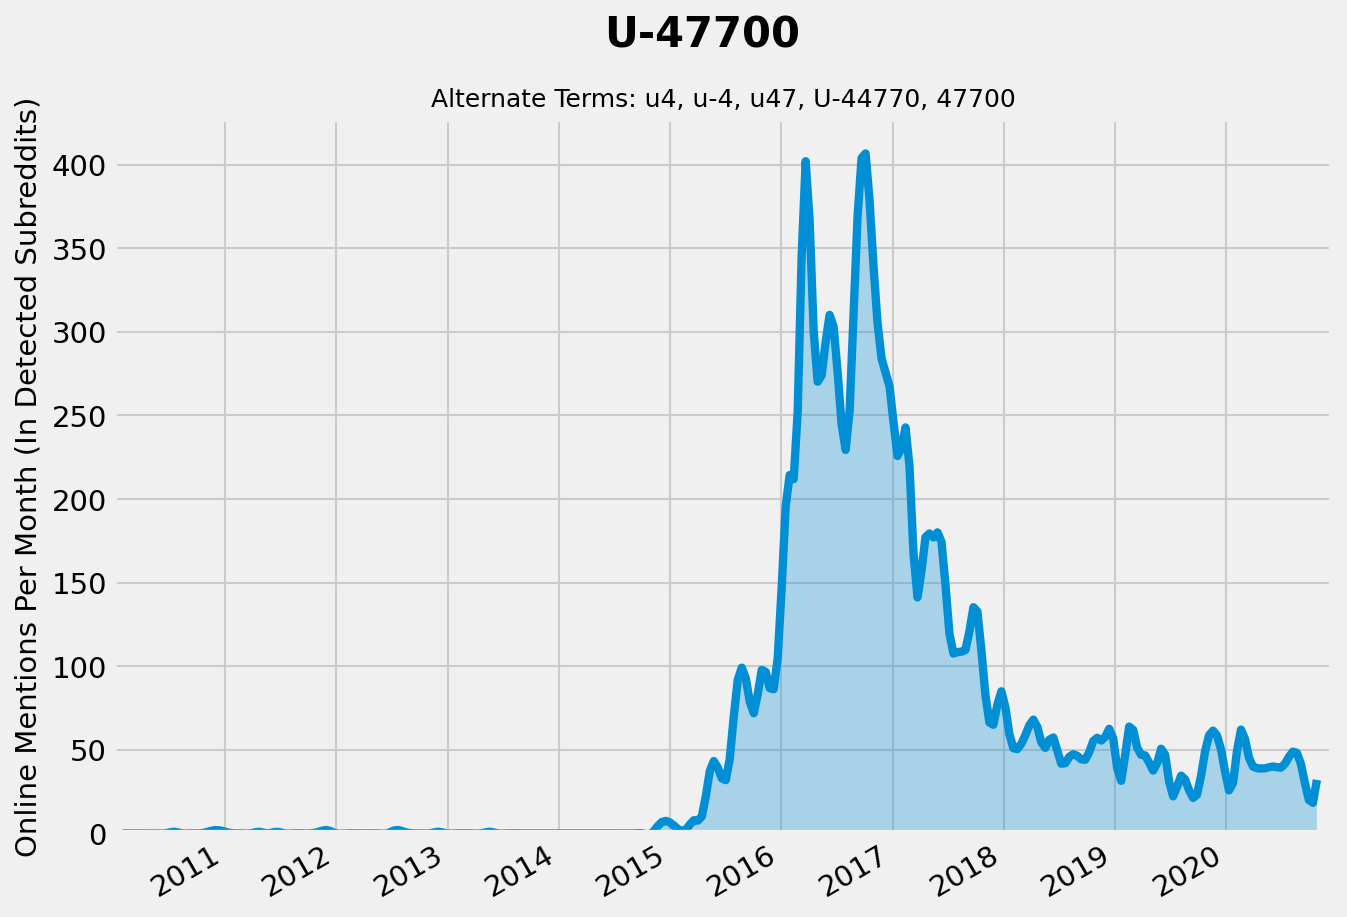

<Figure size 432x288 with 0 Axes>

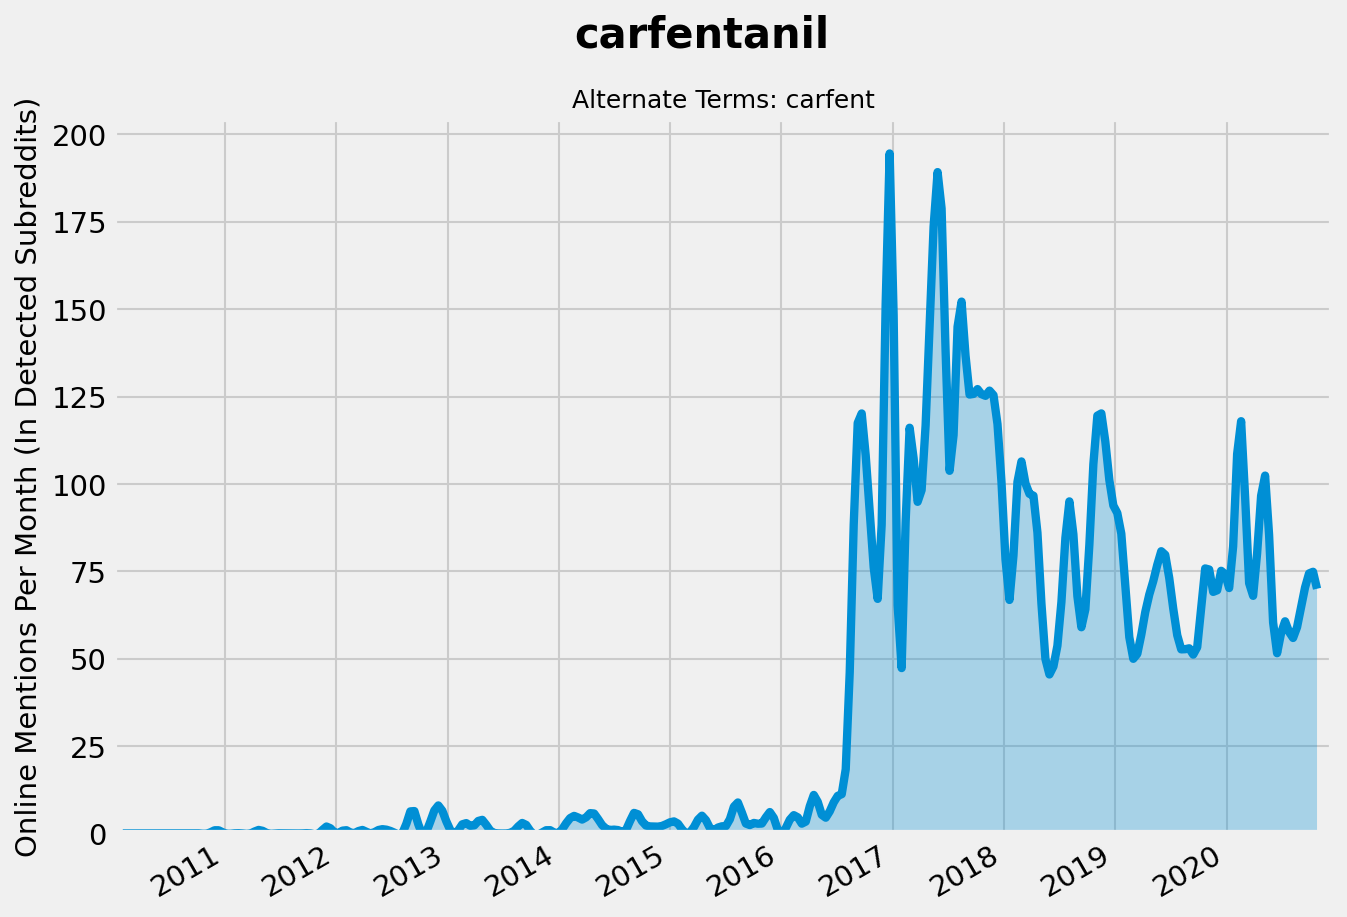

<Figure size 432x288 with 0 Axes>

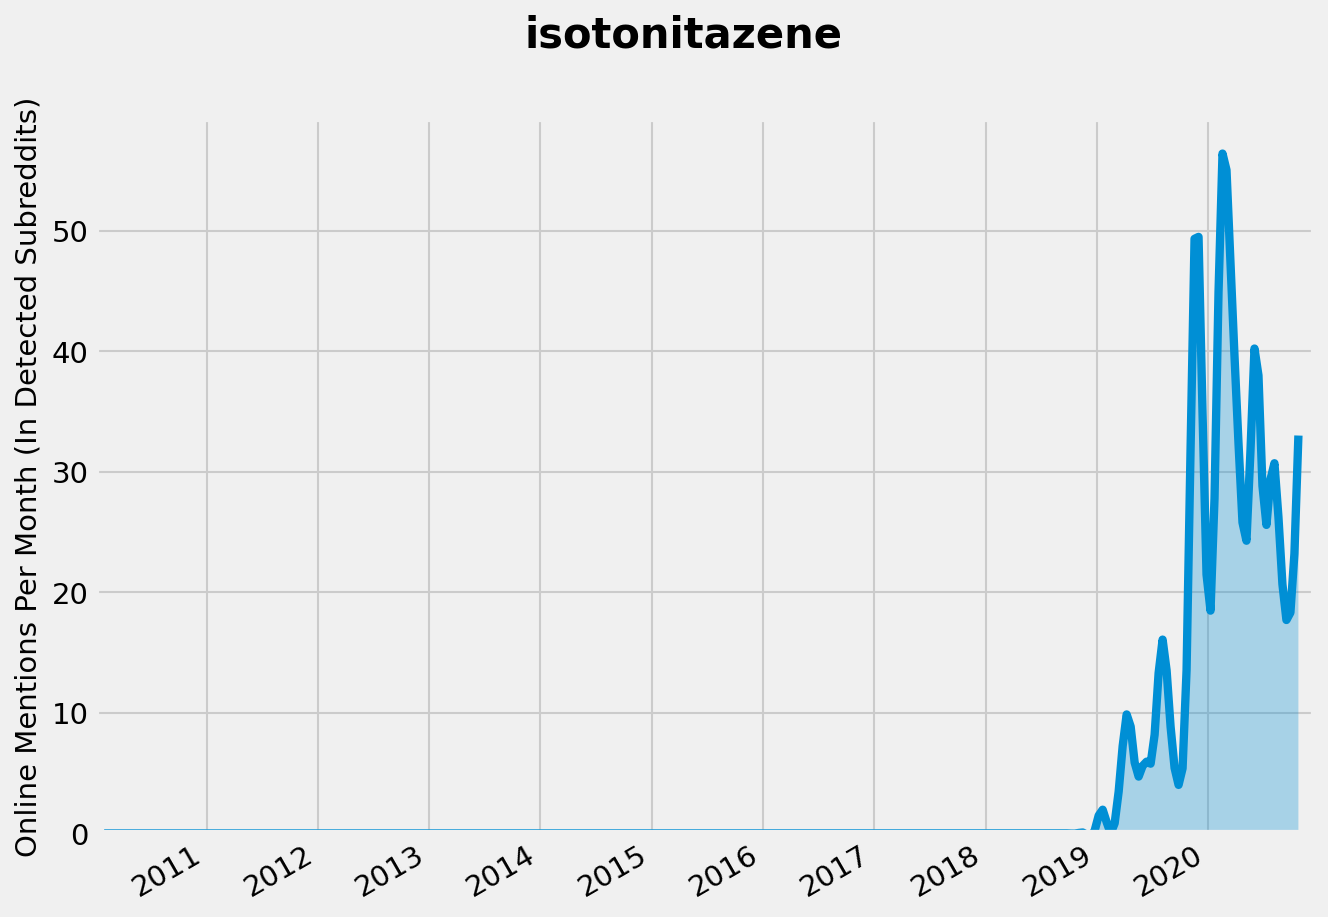

<Figure size 432x288 with 0 Axes>

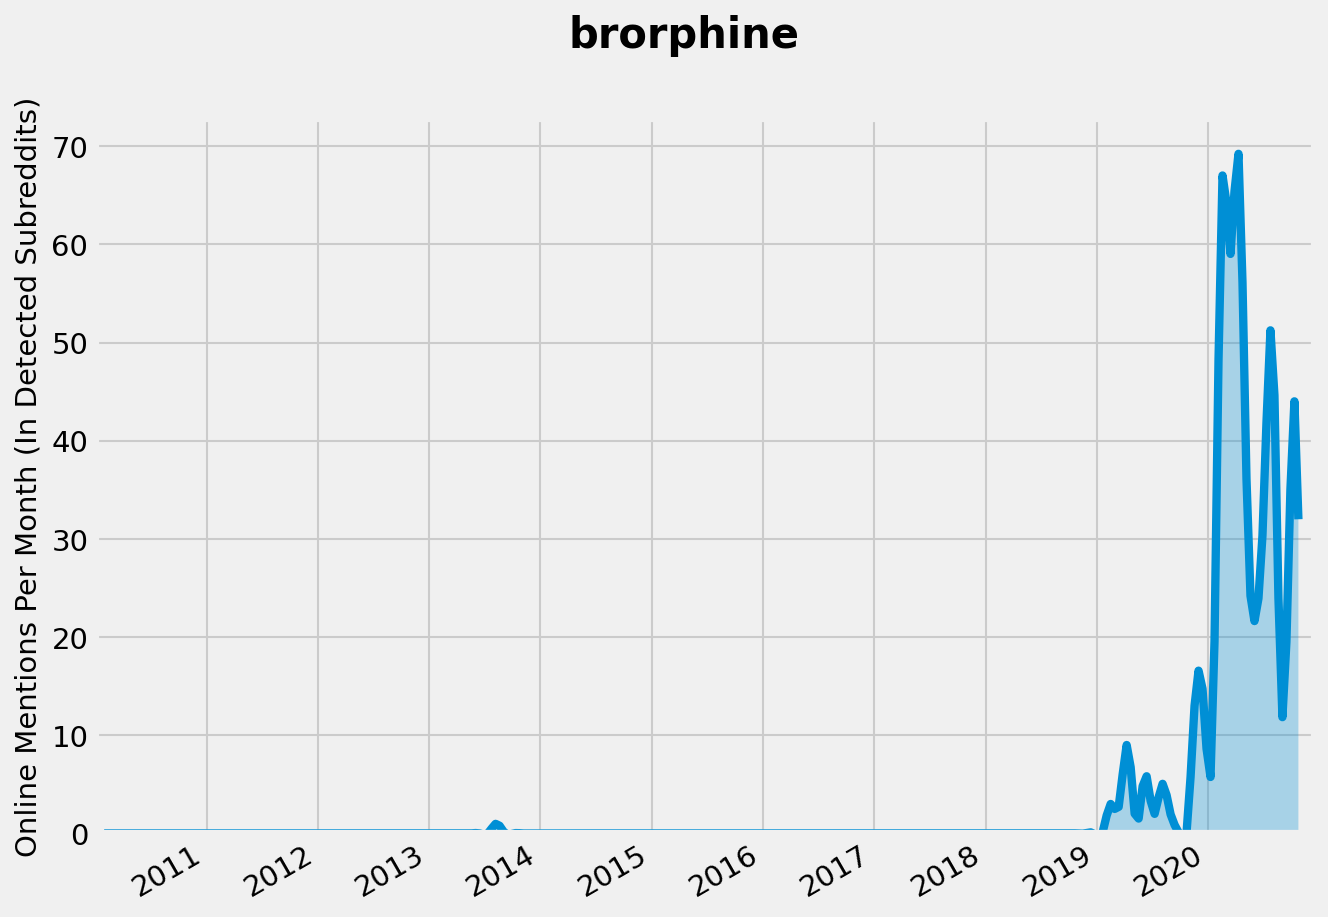

<Figure size 432x288 with 0 Axes>

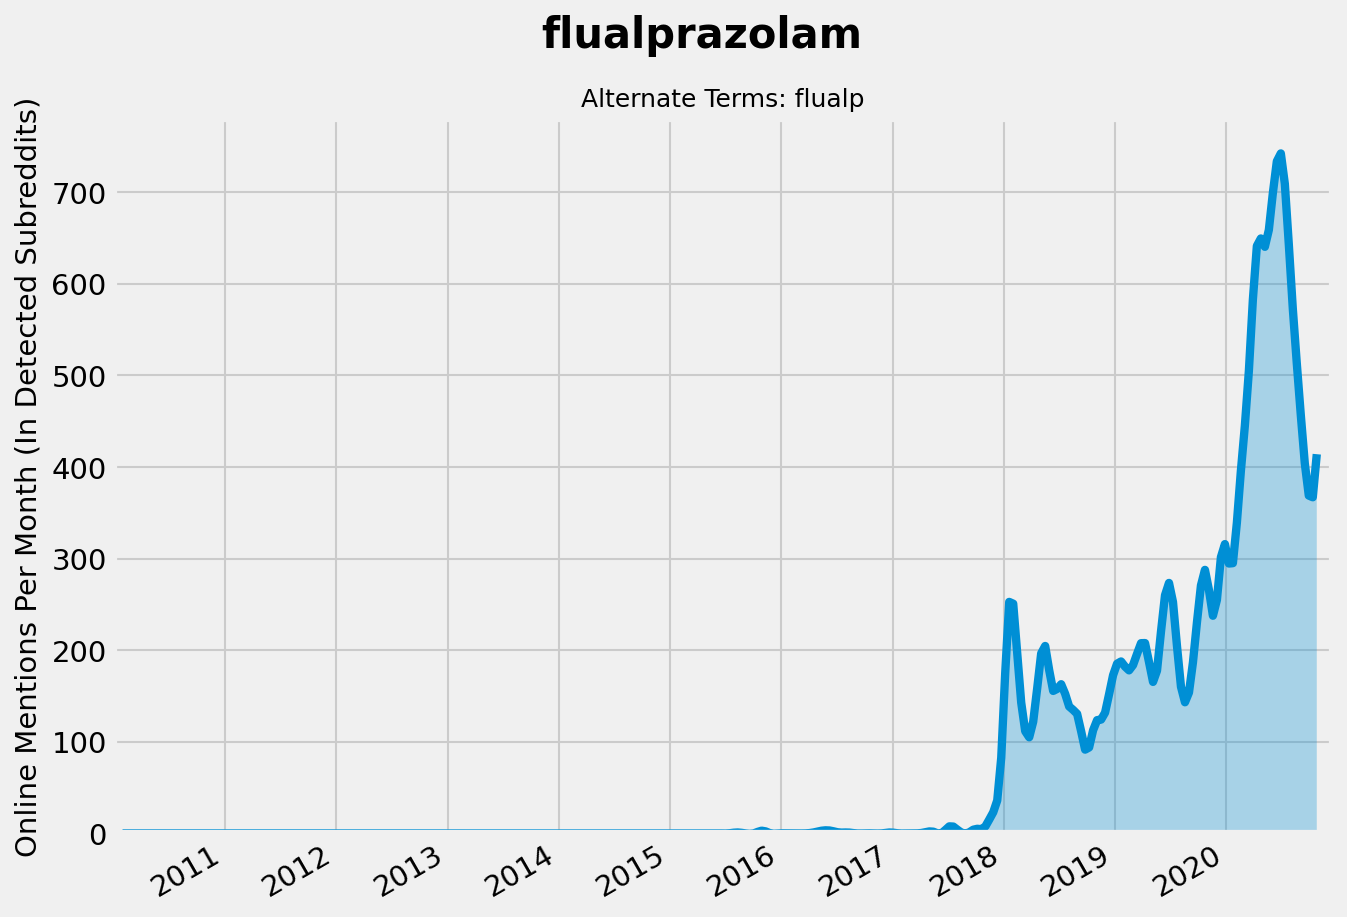

<Figure size 432x288 with 0 Axes>

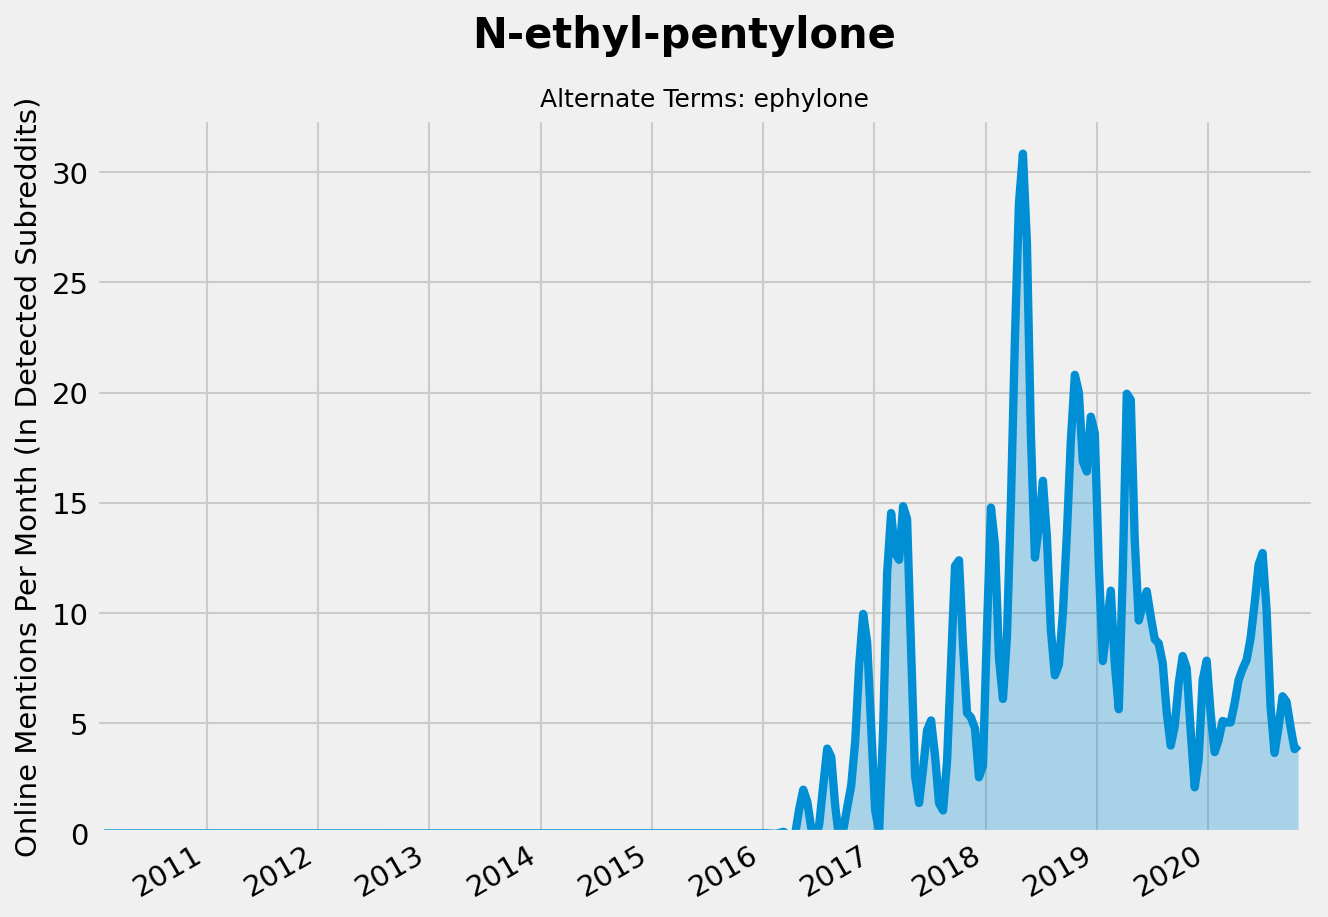

<Figure size 432x288 with 0 Axes>

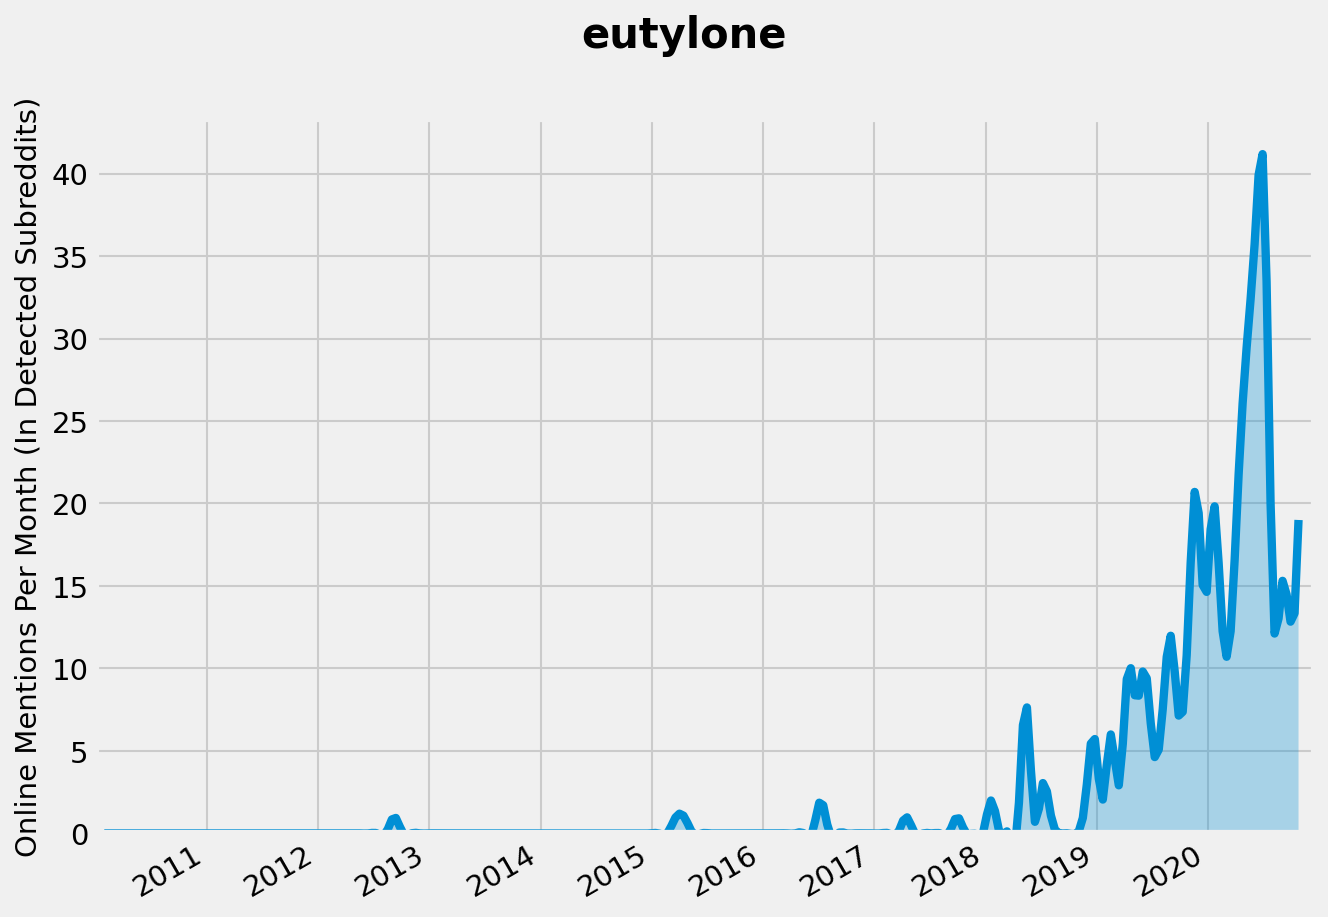

<Figure size 432x288 with 0 Axes>

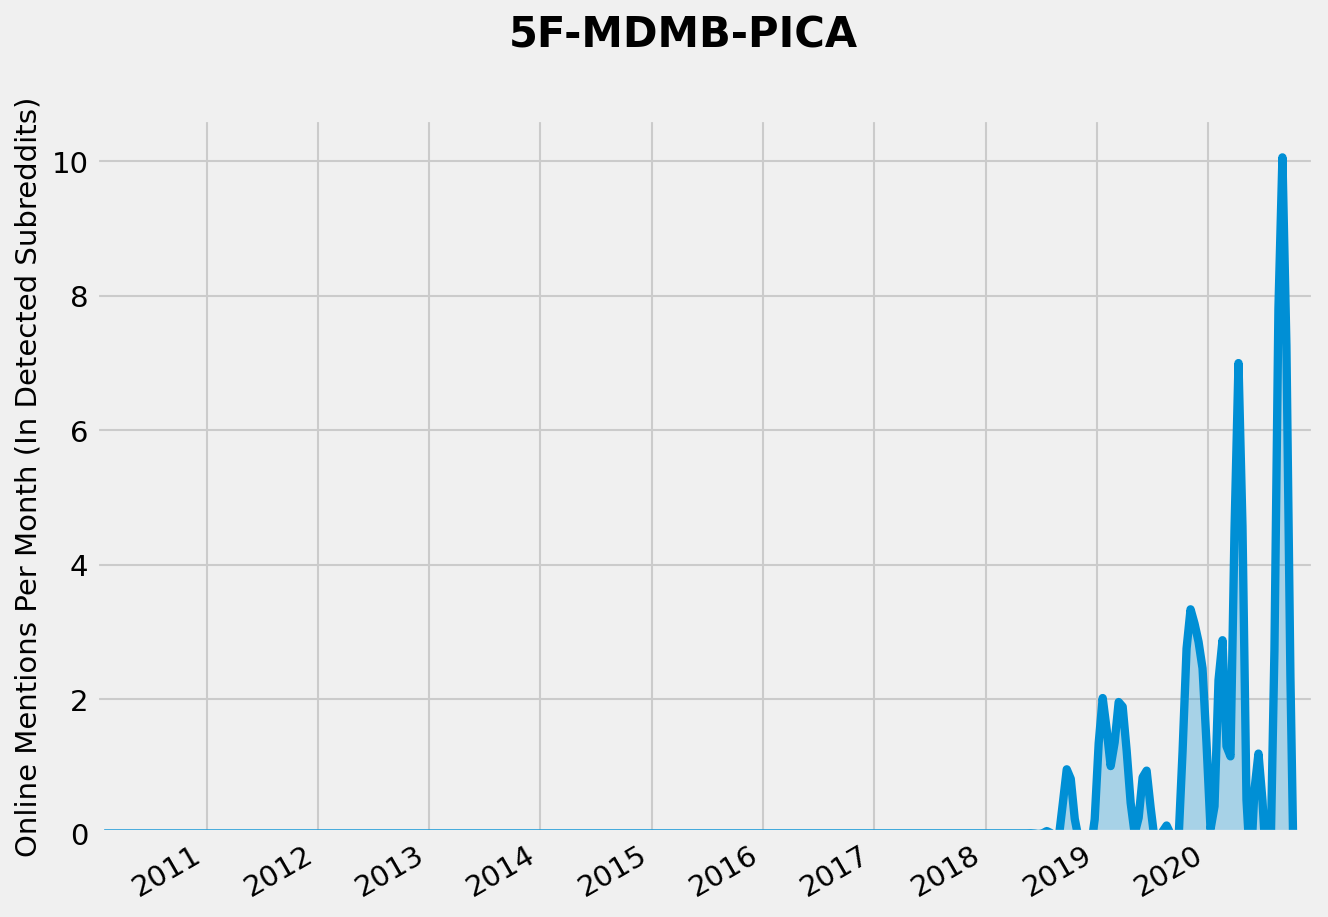

In [13]:
for keyword in nps_keywords:
    plot_keyword(data, keyword, smooth=True, style="fivethirtyeight")